In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets , transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix , classification_report , recall_score , f1_score

In [2]:
transform = transforms.Compose([
    transforms.ToTensor() ,
    transforms.Normalize((0.1307 , ) , (0.3081 , ))
])

In [3]:
train_datasets = datasets.MNIST(root='data' , train=True , download=True , transform=transform)
test_datasets = datasets.MNIST(root='data' , train=False , download=True , transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.75MB/s]


In [8]:
train = DataLoader(train_datasets , batch_size = 64 , shuffle = True)
test = DataLoader(test_datasets , batch_size = 1000 , shuffle = True)

In [12]:
for img , label in train:
  print("shape :" , img.size())
  print("label :" , label.size(0))
  break

shape : torch.Size([64, 1, 28, 28])
label : 64


**Preparing the Neural Network**

In [10]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1 , 32 , kernel_size= (3 , 3) , padding=1 , stride=1)
    self.pool1 = nn.MaxPool2d((2 , 2))
    self.conv2 = nn.Conv2d(32 , 64 , kernel_size= (3 , 3) , padding=1 , stride=1)
    self.pool2 = nn.MaxPool2d((2, 2))
    self.linear1 = nn.Linear(64 * 7 * 7  , 128)
    self.linear2 = nn.Linear(128 , 10)

  def forward(self,x)    :
    x = self.pool1(torch.relu(self.conv1(x)))
    x = self.pool2(torch.relu(self.conv2(x)))
    x = x.view(-1 , 64*7*7)
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [47]:
model = CNN()
cost = nn.CrossEntropyLoss()
optimzer = optim.Adam(model.parameters() , lr=0.001)
epochs = 5
losses = []

for epoch in range(epochs):
   model.train()
   running_loss = 0

   for images , labels in train:
    optimzer.zero_grad()
    predictions = model(images)
    loss = cost(predictions , labels)
    losses.append(loss.item())
    loss.backward()
    optimzer.step()
    running_loss += loss.item()

   print(f"epoch {epoch + 1}/{epochs} , loss : {running_loss / len(train):.4f}")

epoch 1/5 , loss : 0.1347
epoch 2/5 , loss : 0.0441
epoch 3/5 , loss : 0.0297
epoch 4/5 , loss : 0.0228
epoch 5/5 , loss : 0.0162


In [16]:
model.eval()
labls = 0
correct = 0

for img , labels in test:
    with torch.no_grad():
        testing = model(img)
        value , predicted = torch.max(testing , 1)
        correct += (predicted == labels).sum().item()
        labls += labels.size(0)
accuracy = correct / labls
print(f"accuracy : {accuracy*100:.3f}%")

accuracy : 99.060%


In [28]:
y_pred = predicted
y_true = labels
cm = confusion_matrix(y_true , y_pred)
recall = recall_score(y_true , y_pred , average='macro')
f1 = f1_score(y_true , y_pred , average='macro')
cls = classification_report(y_true , y_pred)
print(f"recall score : {recall*100:.2f}%")
print(f"f1 score : {f1*100:.2f}%")
print("-"*22)
print("confusion matrix : \n" , cm)
print("-"*55)
print("classification report : \n" , cls)

recall score : 98.65%
f1 score : 98.67%
----------------------
confusion matrix : 
 [[ 93   0   0   1   0   1   0   0   0   1]
 [  0 107   0   0   0   0   0   0   0   0]
 [  0   0 103   0   0   0   0   2   0   0]
 [  0   0   0 103   0   1   0   0   1   0]
 [  0   0   0   0 113   0   0   0   0   0]
 [  0   0   0   1   0  87   0   0   0   0]
 [  0   0   0   0   1   0  94   0   0   0]
 [  0   1   0   0   0   0   0 101   1   0]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   0   0   1   0   1   0  81]]
-------------------------------------------------------
classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        96
           1       0.99      1.00      1.00       107
           2       1.00      0.98      0.99       105
           3       0.98      0.98      0.98       105
           4       0.99      1.00      1.00       113
           5       0.97      0.99      0.98        88
           6       1.00 

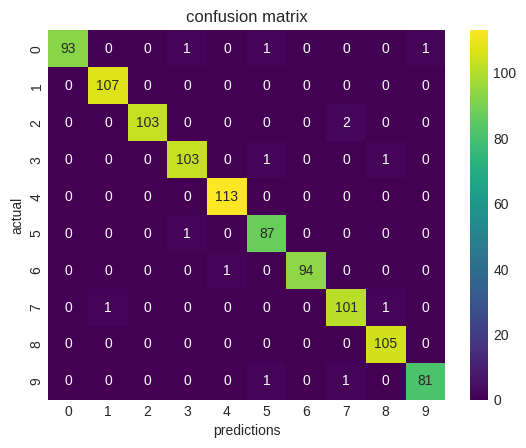

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-dark")
sns.heatmap(cm , annot=True , fmt='d' , cmap='viridis' )
plt.xlabel("predictions")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

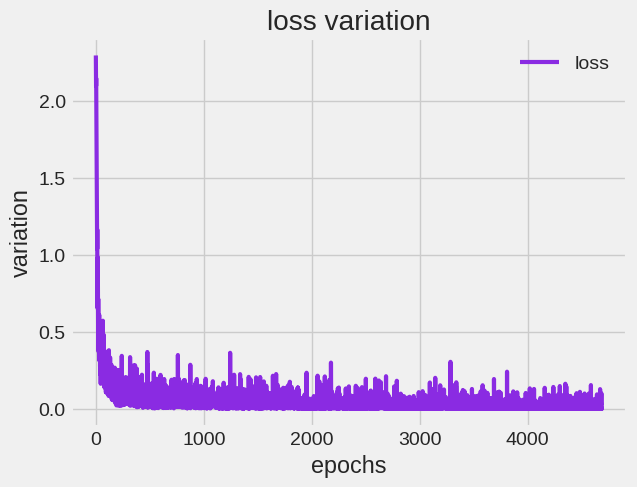

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(len(losses)) , losses[:100] , linewidth = 3 , c='blueviolet' , label= 'loss')
plt.xlabel("epochs")
plt.ylabel("variation")
plt.title("loss variation")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
y_pred = predicted
y_true = labels

tensor([5, 1, 6, 6, 2, 1, 7, 3, 7, 5])

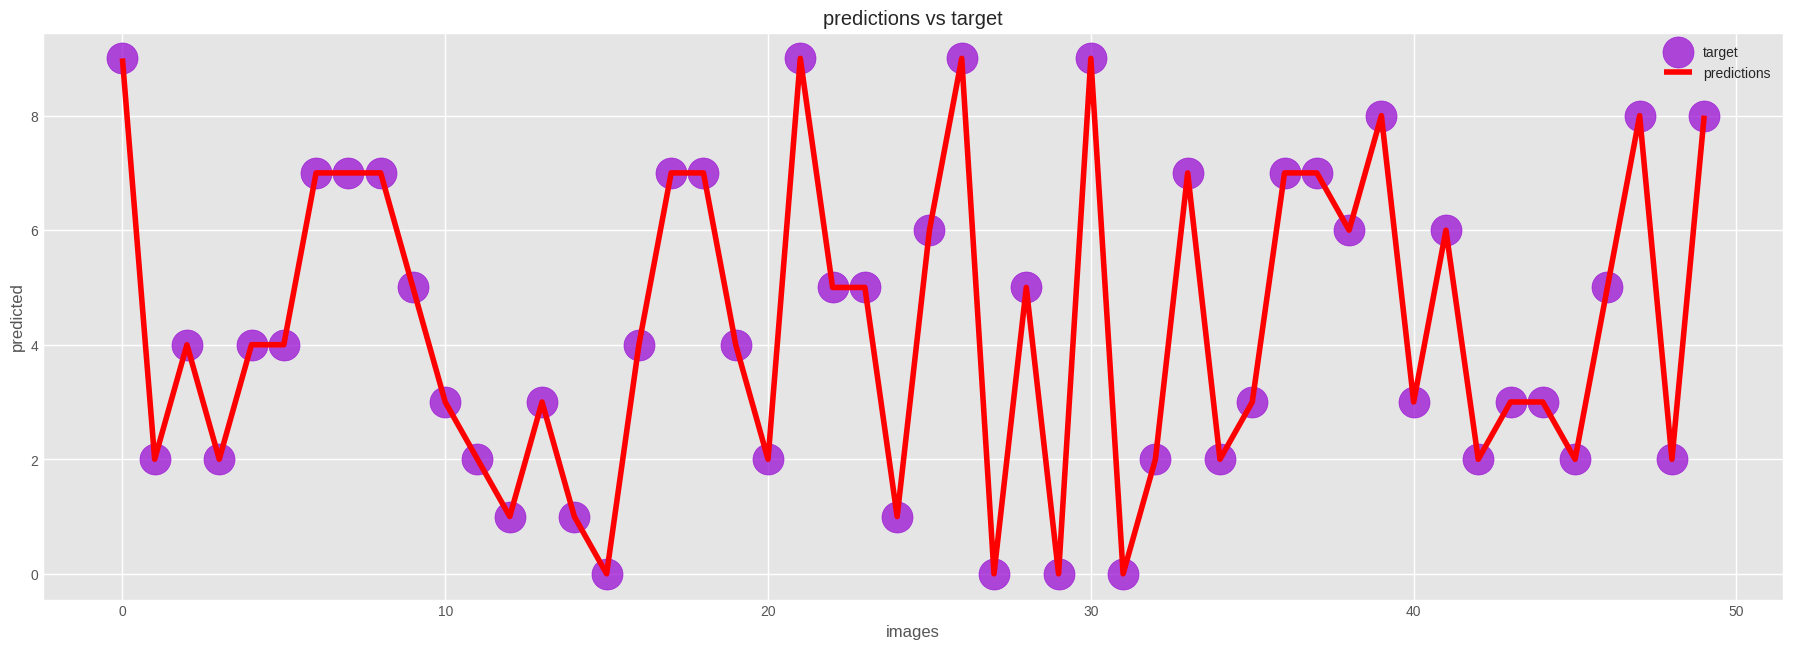

In [65]:
plt.style.use("ggplot")
plt.figure(figsize=(20 , 7))
plt.scatter(range(50) , y_true[:50].numpy() , c='darkviolet' , label = 'target' , s=500 , alpha = 0.7)
plt.plot(range(50) , y_pred[:50].numpy() , c='red' , label = 'predictions' , linewidth = 4)
plt.xlabel("images")
plt.ylabel("predicted")
plt.title("predictions vs target")
plt.legend()
plt.grid(True)
plt.show()